In [2]:
import cv2
import socket
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Bidirectional,BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
actions = ['chop', 'down', 'idle', 'left', 'pinch', 'up']

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, holistic_model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = holistic_model.process(image)        # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [1]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*2)
    rh = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*2)
    return np.concatenate([lh, rh])

In [7]:
# def process_npy():    
#     # Set mediapipe model 
#     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
#         for action in actions:
            
#             # Lấy danh sách tất cả video trong folder của action cụ thể
#             video_folder = f'newdata/{action}'
#             videos = [f for f in os.listdir(video_folder) if f.endswith('.avi')]
            
#             for videoCounter, videoFile in enumerate(videos):
                
#                 cap = cv2.VideoCapture(os.path.join(video_folder, videoFile))
#                 framesCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#                 skipFrame = max(int(framesCount/10), 1)
                
#                 for frameCounter in range(10):
                    
#                     cap.set(cv2.CAP_PROP_POS_FRAMES, frameCounter * skipFrame)
#                     ret, frame = cap.read()
                    
#                     if not ret:
#                         break
                    
#                     image, results = mediapipe_detection(frame, holistic)
#                     # draw_styled_landmarks(image, results)
#                     cv2.imshow('OpenCV Feed', image)
                    
#                     keypoints = extract_keypoints(results)
                    
#                     # Tạo thư mục để lưu các keypoints của video và frame hiện tại
#                     npy_dir = os.path.join('newdata_npy', action, str(videoCounter))
#                     os.makedirs(npy_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
                    
#                     npy_path = os.path.join('newdata_npy', action, str(videoCounter), str(frameCounter))
#                     np.save(npy_path, keypoints)
                    
#                     print(f'{action}: saving frame {frameCounter} of video {videoCounter}')
                    
#                     if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break
                
#                 cap.release()
#         cv2.destroyAllWindows()

In [7]:
def process_npy(action):    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
            
        # Lấy danh sách tất cả video trong folder của action cụ thể
        video_folder = f'newdata/{action}'
        videos = [f for f in os.listdir(video_folder) if f.endswith('.avi')]
        
        for videoCounter, videoFile in enumerate(videos):
            
            cap = cv2.VideoCapture(os.path.join(video_folder, videoFile))
            framesCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            skipFrame = max(int(framesCount/10), 1)
            
            for frameCounter in range(10):
                
                cap.set(cv2.CAP_PROP_POS_FRAMES, frameCounter * skipFrame)
                ret, frame = cap.read()
                
                if not ret:
                    break
                
                image, results = mediapipe_detection(frame, holistic)
                # draw_styled_landmarks(image, results)
                cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                
                # Tạo thư mục để lưu các keypoints của video và frame hiện tại
                npy_dir = os.path.join('newdata_npy', action, str(videoCounter))
                os.makedirs(npy_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
                
                npy_path = os.path.join('newdata_npy', action, str(videoCounter), str(frameCounter))
                np.save(npy_path, keypoints)
                
                print(f'{action}: saving frame {frameCounter} of video {videoCounter}')
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
            cap.release()
    cv2.destroyAllWindows()

In [8]:
for action in actions:    
    process_npy(f'{action}')

d:\Phong\Coding\HandTracking\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


chop: saving frame 0 of video 0
chop: saving frame 1 of video 0
chop: saving frame 2 of video 0
chop: saving frame 3 of video 0
chop: saving frame 4 of video 0
chop: saving frame 5 of video 0
chop: saving frame 6 of video 0
chop: saving frame 7 of video 0
chop: saving frame 8 of video 0
chop: saving frame 9 of video 0
chop: saving frame 0 of video 1
chop: saving frame 1 of video 1
chop: saving frame 2 of video 1
chop: saving frame 3 of video 1
chop: saving frame 4 of video 1
chop: saving frame 5 of video 1
chop: saving frame 6 of video 1
chop: saving frame 7 of video 1
chop: saving frame 8 of video 1
chop: saving frame 9 of video 1
chop: saving frame 0 of video 2
chop: saving frame 1 of video 2
chop: saving frame 2 of video 2
chop: saving frame 3 of video 2
chop: saving frame 4 of video 2
chop: saving frame 5 of video 2
chop: saving frame 6 of video 2
chop: saving frame 7 of video 2
chop: saving frame 8 of video 2
chop: saving frame 9 of video 2
chop: saving frame 0 of video 3
chop: sa

In [9]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'chop': 0, 'down': 1, 'idle': 2, 'left': 3, 'pinch': 4, 'up': 5}

In [10]:
def create_dataset():   
    sequences, labels = [], []    
    for action in actions:
        
        # Lấy danh sách tất cả video trong folder của action cụ thể
        video_folder = f'newdata_npy/{action}'
        videos = sorted([f for f in os.listdir(video_folder) if os.path.isdir(os.path.join(video_folder, f))], key=lambda x: int(x))
        
        # videos = videos[:100]
        
        # Lặp qua tất cả video trong folder
        for sequence in videos:
            print(sequence)
            window = []
            for frame_num in range(10):  # Giả định rằng mỗi video có 30 frame cần xử lý
                # Đọc file numpy của từng frame
                print(f'{action}: Loading frame {frame_num} of video {sequence}')
                res = np.load(os.path.join('newdata_npy', action, sequence, "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])
    
    return sequences, labels

In [11]:
sequences, labels = create_dataset()

X = np.array(sequences)
y = np.array(labels)

print(X.shape)
print(y.shape)

y = to_categorical(labels).astype(int)
print(y)

0
chop: Loading frame 0 of video 0
chop: Loading frame 1 of video 0
chop: Loading frame 2 of video 0
chop: Loading frame 3 of video 0
chop: Loading frame 4 of video 0
chop: Loading frame 5 of video 0
chop: Loading frame 6 of video 0
chop: Loading frame 7 of video 0
chop: Loading frame 8 of video 0
chop: Loading frame 9 of video 0
1
chop: Loading frame 0 of video 1
chop: Loading frame 1 of video 1
chop: Loading frame 2 of video 1
chop: Loading frame 3 of video 1
chop: Loading frame 4 of video 1
chop: Loading frame 5 of video 1
chop: Loading frame 6 of video 1
chop: Loading frame 7 of video 1
chop: Loading frame 8 of video 1
chop: Loading frame 9 of video 1
2
chop: Loading frame 0 of video 2
chop: Loading frame 1 of video 2
chop: Loading frame 2 of video 2
chop: Loading frame 3 of video 2
chop: Loading frame 4 of video 2
chop: Loading frame 5 of video 2
chop: Loading frame 6 of video 2
chop: Loading frame 7 of video 2
chop: Loading frame 8 of video 2
chop: Loading frame 9 of video 2
3
ch

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape

(360, 6)

In [13]:
X.shape

(1799, 10, 84)

In [17]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,84)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,806 (753.15 KB)

 Trainable params: 192,806 (753.15 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4221 - loss: 1.5498 - val_accuracy: 0.6778 - val_loss: 1.2628
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7323 - loss: 0.8174 - val_accuracy: 0.8417 - val_loss: 0.8523
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8660 - loss: 0.6397 - val_accuracy: 0.8528 - val_loss: 0.5793
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8830 - loss: 0.3709 - val_accuracy: 0.8889 - val_loss: 0.3742
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9077 - loss: 0.2869 - val_accuracy: 0.9306 - val_loss: 0.3093
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9268 - loss: 0.2172 - val_accuracy: 0.8944 - val_loss: 0.3993
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9202 - loss: 0.2551 - val_accuracy: 0.9111 - val_loss: 0.3415
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9221 - loss: 0.2349 - val_accuracy: 0.8

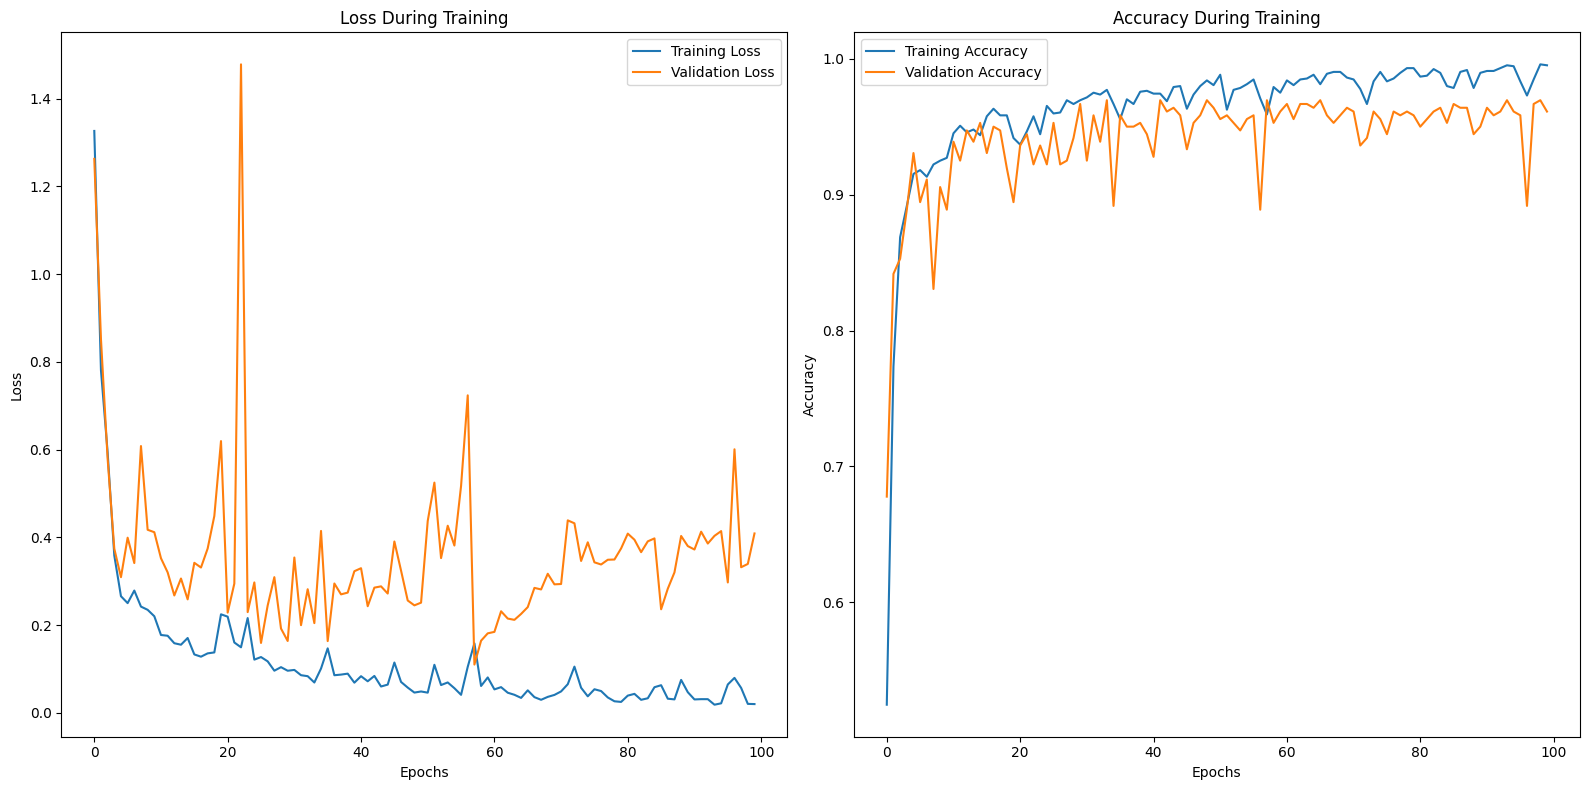

In [20]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
res = model.predict(X_test)
actions[np.argmax(res[4])]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


'down'

In [22]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
confusion_matrix(ytrue, yhat)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[62,  0,  0,  1,  4,  0],
       [ 0, 59,  1,  1,  0,  0],
       [ 0,  2, 53,  1,  0,  3],
       [ 0,  0,  1, 53,  0,  0],
       [ 0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0, 68]], dtype=int64)

In [23]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,234,245), (16,117,245), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [24]:
IP = '127.0.0.1'
PORT = 25001

s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

def SendData(message):
    s.sendto(message.encode(), (IP, PORT))
    print(f"{message} sent")

In [29]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7
frame_counter = 0  # Khởi tạo biến đếm

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        frame_counter += 1  # Tăng biến đếm lên mỗi khi đọc khung hình
        if frame_counter % 3 != 0:  # Chỉ xử lý mỗi khung hình thứ 3 (tùy chỉnh)
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        # new_sequence = sequence[-1:-21:-2]
        # print(len(new_sequence))
        # print(len(sequence))
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            SendData(actions[np.argmax(res)])    
        
        # #3. Viz logic
        # if np.unique(predictions[-10:])[0]==np.argmax(res): 
        #     if res[np.argmax(res)] > threshold: 
                
        #         if len(sentence) > 0: 
        #             if actions[np.argmax(res)] != sentence[-1]:
        #                 sentence.append(actions[np.argmax(res)])
        #         else:
        #             sentence.append(actions[np.argmax(res)])

        # if len(sentence) > 5: 
        #     sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
idle
idle sent
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
idle
idle sent
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
idle
idle sent
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
idle
idle sent
<class 'mediapipe.python.solution_base.Solution